# Lecture 17 - Search Algorithms 

Today: 
* A couple of simple search algorithms:
  * Linear search
  * Binary search 
* A very brief introduction to runtime analysis and Big O Notation
* Word counting with dictionaries


# Algorithms

* Algorithm: a finite sequence of computer instructions to solve a class of problems (eg search, pattern recognition) or to perform a computation (eg matrix multiplication)
  * can be written as code (eg in Python)
  * or as pseudo-code

We compare algorithms according to their performance characteristics, typically:
  * Speed
  * Memory and computational requirments
  * Performance at the task - do they solve the problem? If partially, how well?


To give you a flavor of how think about and develop algorithms and data structures today we'll look at problems of searching text and develop a couple of simple algorithms and compare them. 

# Loading Some Test Data

We're going to implement some methods to search a corpus (collection) of words.

Let's start by grabbing some text. Here, we'll load Alice in Wonderland (the example used in the open text book):

In [2]:
import urllib.request

# Location of book
url = "http://openbookproject.net/thinkcs/python/english3e/_downloads/alice_in_wonderland.txt"
local_copy = "alice_in_wonderland.txt" # Local file to store book in

urllib.request.urlretrieve(url, local_copy) # This function copies the 
# thing the url points at into the local file copy

with open(local_copy) as fh: # Read from the local file into a string
  alice_text = fh.read()

We've loaded the data, let's check it looks okay:

In [4]:
print(len(alice_text))
print(alice_text[:850]) # Check we've got the words

144391

ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll



CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (wh


Let's preprocess the data into lowercase words:

In [8]:
# Make all the alphabet characters lower case (so that we ignore capitalization)
alice_text = alice_text.lower()

alice_words = alice_text.split() # Chop the text up into individual words
# using the split() method, which breaks the string up at whitespace

Finally, let's check it:

In [6]:
## Checking again:
print(f"There are {len(alice_words)} words")

print(alice_words[:85])

There are 26443 words
["alice's", 'adventures', 'in', 'wonderland', 'lewis', 'carroll', 'chapter', 'i.', 'down', 'the', 'rabbit-hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank,', 'and', 'of', 'having', 'nothing', 'to', 'do:', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading,', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it,', "'and", 'what', 'is', 'the', 'use', 'of', 'a', "book,'", 'thought', 'alice', "'without", 'pictures', 'or', "conversation?'", 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(as', 'well', 'as', 'she', 'could,', 'for', 'the', 'hot', 'day']


# Linear Search

Let's implement a simplest possible method to check if a search word is in Alice in Wonderland:

In [7]:
# First, a quick aside on "enumerate()"

# enumerate is a cool function which returns for each
# element v in a list a pair (i, v), where i is the index of v in the list
for (i, word) in enumerate("some words in a string".split()):
  print("index:", i, "word:", word)

index: 0 word: some
index: 1 word: words
index: 2 word: in
index: 3 word: a
index: 4 word: string


In [25]:
def search_linear(text, target):
    """ Find and return the index of the first instance of target in text.
    """
    for (i, word) in enumerate(text): 
       if word == target:
           return i # We return the first index
    return -1 # We did not find the string

The **algorithm** here is the simplest you  think of - informally: to check if the word is in the text start reading the text from the beginning, and then, if you find it, return, otherwise keep going until you reach the end. Let's check it works:

In [9]:
x = search_linear(alice_words, target="hatter") 
# Search for the word "hatter" in the text" - this should
# be here, cos of the "Mad Hatter"

if x != -1:
  print("Found hatter at: ", x, " context: ", alice_words[x:x+100]) # Check the match

Found hatter at:  13384  context:  ['hatter', "instead!'", 'chapter', 'vii.', 'a', 'mad', 'tea-party', 'there', 'was', 'a', 'table', 'set', 'out', 'under', 'a', 'tree', 'in', 'front', 'of', 'the', 'house,', 'and', 'the', 'march', 'hare', 'and', 'the', 'hatter', 'were', 'having', 'tea', 'at', 'it:', 'a', 'dormouse', 'was', 'sitting', 'between', 'them,', 'fast', 'asleep,', 'and', 'the', 'other', 'two', 'were', 'using', 'it', 'as', 'a', 'cushion,', 'resting', 'their', 'elbows', 'on', 'it,', 'and', 'talking', 'over', 'its', 'head.', "'very", 'uncomfortable', 'for', 'the', "dormouse,'", 'thought', 'alice;', "'only,", 'as', "it's", 'asleep,', 'i', 'suppose', 'it', "doesn't", "mind.'", 'the', 'table', 'was', 'a', 'large', 'one,', 'but', 'the', 'three', 'were', 'all', 'crowded', 'together', 'at', 'one', 'corner', 'of', 'it:', "'no", 'room!', 'no', "room!'", 'they']


In [10]:
# Let's check a negative case:
# Search for the word "donald" in the text"
x = search_linear(alice_words, target="donald") 

print(x) # Donald is not in the text

-1


# Challenge 1

In [10]:
# Adapt search_linear to find and return the last instance of the target in the text. 
# Call the adapted function search_linear_reversed

def search_linear_reversed(text, target):

    
x = search_linear_reversed(alice_words, target="hatter") 
# Search for the word "hatter" in the text" - this should
# be here, cos of the "Mad Hatter"

if x != -1:
  print("Found hatter at: ", x, " context: ", alice_words[x:x+100]) # Check the match

Found hatter at:  24051  context:  ['hatter', 'was', 'out', 'of', 'sight', 'before', 'the', 'officer', 'could', 'get', 'to', 'the', 'door.', "'call", 'the', 'next', "witness!'", 'said', 'the', 'king.', 'the', 'next', 'witness', 'was', 'the', "duchess's", 'cook.', 'she', 'carried', 'the', 'pepper-box', 'in', 'her', 'hand,', 'and', 'alice', 'guessed', 'who', 'it', 'was,', 'even', 'before', 'she', 'got', 'into', 'the', 'court,', 'by', 'the', 'way', 'the', 'people', 'near', 'the', 'door', 'began', 'sneezing', 'all', 'at', 'once.', "'give", 'your', "evidence,'", 'said', 'the', 'king.', "'shan't,'", 'said', 'the', 'cook.', 'the', 'king', 'looked', 'anxiously', 'at', 'the', 'white', 'rabbit,', 'who', 'said', 'in', 'a', 'low', 'voice,', "'your", 'majesty', 'must', 'cross-examine', 'this', "witness.'", "'well,", 'if', 'i', 'must,', 'i', "must,'", 'the', 'king', 'said,', 'with']


# Pseudocode

Often times when we write algorithms in **pseudocode**, a programming language like description of the procedure that is sufficintly formal to allow implementation. For example, we can write down the linear 
search algorithm in pseudocode:

* let s be the search word
* let t be the text we are searching as a list of words
* let j equal -1

* for each word w and its index i in t, from beginning to end:
    * if s equals w:
        * j = i, setting the index of w in t
        * break out of the loop

* at termination, j equals the first index of s in t or -1 if s is not contained in t

Pseudocode should be sufficiently detailed to make it clear how to implement it, but it need not be an actual implementation in a language like Python.

# Big O Notation - Analyzing Computational Complexity

* Say that *N* is the number of words in the text you're searching. 
* In the **worst case** (if the word you search for is not in the text), it takes *N* string comparisons for search_linear() to run. 

* We denote this as **O(N) time**, which is a shorthand called "Big O notation" for saying that the **worst-case running time** of search_linear is linear in the length of the text. 

*  For many applications, O(N) may be just fine, but often, if you want to analyse a lot of data, or if you want to run the algorithm a lot of times, you find you need faster methods. 

# Binary Search

Suppose we first sort the words in the text. Then the following "binary search" algorithm is much faster.

Here's an illustration - we are searching for 7 in the sorted list of integers (example from Wikipedia):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Binary_Search_Depiction.svg/2880px-Binary_Search_Depiction.svg.png" width=800 height=400 />


We start from the middle of the list, and then check if the middle element is less than, equal or greater than the search query. Based on the result we either find the query or can halve the size of the search, and so recursively solve the problem.

# Binary Search Pseudocode

* let s be the search word
* let t be the text we are searching as a list of N words sorted
in ascending order

* let l = 0, the leftmost index of our search interval (inclusive)
* let r = N, rightmost index of search interval (exclusive)
* let i = -1 

* while l < r, the interval that we are searching is non-zero length
  * m = (l + r) // 2, the mid point of the interval

  * if s < t[m]: (If the word is in t it must be in the interval l, m)
    * r = m # Shrink the interval from the right

  * else if s > t[m]: (If the word is in t it must be in the interval m+1, r)
    * l = m+1 # Shrink the interval from the left

  * else: s must equal t[m]
    * i = m
    * break out of the loop

* at termination i equals an index of s in t or -1 if s is not contained in t
  

Let's translate this into a Python function:

In [13]:
def search_binary(sorted_text, target, debug_print=False):
    """ Find and return an index of target in sorted_text
    """
    # l and r represent the region of interest (ROI) that we search over
    # initially the ROI is the whole of sorted_text
    l = 0 
    r = len(sorted_text)
    
    while l < r:
        m = (l + r) // 2 # The mid point of the interval

        if debug_print:
          print(f"Interval {l} to {r} size {r-l} looking at index {m} word '{sorted_text[m]}'")

        if target < sorted_text[m]:
          r = m

        elif target > sorted_text[m]:
          l = m+1

        else:
          assert target == sorted_text[m] # Sanity check
          return m
    
    return -1 # If we've gotten here the word isn't in the text

So, let's test it:

In [14]:
# Let's demo search binary

sorted_alice_words = sorted(alice_words) 
# Sort the words in alice in wonder land into dictionary order

#print(sorted_alice_words[:100])

x = search_binary(sorted_alice_words, target="hatter", debug_print=True) 
# Search for the word "hatter" in the text" 

if x != -1:
  print("Found hatter at: ", x) # Check the match

Interval 0 to 26443 size 26443 looking at index 13221 word 'many'
Interval 0 to 13221 size 13221 looking at index 6610 word 'distraction,'
Interval 6611 to 13221 size 6610 looking at index 9916 word 'herself.'
Interval 6611 to 9916 size 3305 looking at index 8263 word 'get'
Interval 8264 to 9916 size 1652 looking at index 9090 word 'hare:'
Interval 9091 to 9916 size 825 looking at index 9503 word 'hearts'
Interval 9091 to 9503 size 412 looking at index 9297 word 'he'
Interval 9091 to 9297 size 206 looking at index 9194 word 'have'
Interval 9091 to 9194 size 103 looking at index 9142 word 'hatter'
Found hatter at:  9142


In [15]:
# Let's check a negative case:
x = search_binary(sorted_alice_words, target="donald", debug_print=True) 
# Search for the word "donald" in the text"
# I don't remember a Donald in the book

print(x) # Donald is not in the text

Interval 0 to 26443 size 26443 looking at index 13221 word 'many'
Interval 0 to 13221 size 13221 looking at index 6610 word 'distraction,'
Interval 6611 to 13221 size 6610 looking at index 9916 word 'herself.'
Interval 6611 to 9916 size 3305 looking at index 8263 word 'get'
Interval 6611 to 8263 size 1652 looking at index 7437 word 'eye,'
Interval 6611 to 7437 size 826 looking at index 7024 word 'dreamy'
Interval 6611 to 7024 size 413 looking at index 6817 word 'door,'
Interval 6611 to 6817 size 206 looking at index 6714 word 'doesn't'
Interval 6715 to 6817 size 102 looking at index 6766 word 'don't'
Interval 6767 to 6817 size 50 looking at index 6792 word 'done'
Interval 6767 to 6792 size 25 looking at index 6779 word 'don't'
Interval 6780 to 6792 size 12 looking at index 6786 word 'don't!''
Interval 6787 to 6792 size 5 looking at index 6789 word 'done'
Interval 6787 to 6789 size 2 looking at index 6788 word 'done'
Interval 6787 to 6788 size 1 looking at index 6787 word 'done'
-1


# Challenge 2

In [23]:
# Write an adapted version of search_binary that uses recursion

def search_binary_recursive(sorted_text, target):
    """ Find and return an index of target in sorted_text
    """
    # Code to write - hint, use slices to reduce the size of the list to search
    return -1
    
x = search_binary_recursive(sorted_alice_words, "hatter") 
# Search for the word "hatter" in the text" 

if x != -1:
  print("Found hatter at: ", x, " context: ", sorted_alice_words[x-10:x+10]) 


# Analysing Computational Complexity

* Intuitively binary_search seems a lot faster than the linear_search. 
* Can we figure out it's actual worst case running time?
  * Knowing the worst-case is helpful, because it lets us design robust programs that will *always* run quickly, regardless of the input.

* Let N be the number of words in the text. 

* At each loop of the code we halve the size of the list we're searching. 
* It follows we can not perform more than log2(N) loops to find any word (or establish it is not there). 
  * (See the text book for a slightly more detailed explanation). 

* The worst case running time is therefore O(log2(N)). 
* Note we typically write O(log2(N)) as simply O(log(N)) (using the natural logarithm) as they are the same within a constant factor, and we don't care about the constant factors, just the nature of the scaling curve.





# Comparing Linear vs. Binary Search Empirically

In [30]:
# So, what is the speed difference for queries to these methods on data?

import time
import random

# Sample with replacement 10,000 words from the book 
## Reminder: this is a list comprehension: super useful
test_words = [ random.choice(alice_words) for i in range(100000)] 

# Sum up the amount of time it takes to locate these words in the book
# using the linear search method
start_time = time.time() # time.time() gives the time in seconds to high precision
for test_word in test_words:
  search_linear(alice_words, target=test_word)
linear_time = time.time()-start_time

# Print the total linear search time
print(f"It took {linear_time} seconds to search linear")


It took 12.30310320854187 seconds to search linear


Okay, how about binary search?

In [31]:
# Sum up the amount of time it takes to locate these words in the book
# using the binary search method
start_time = time.time()
for test_word in test_words:
  search_binary(sorted_alice_words, target=test_word)
binary_time = time.time()-start_time

print(f"It took {binary_time} seconds to search binary")

print(f"Speed up of binary vs. linear is {linear_time/binary_time} times")

It took 0.1647932529449463 seconds to search binary
Speed up of binary vs. linear is 74.65780903452436 times


# Word Counting with Dictionaries

Linear search takes O(N) time

Binary search takes O(log(N)) time

Can we do better?

Now we use a dictionary to produce a map from the words in the text to their locations:

In [33]:
def index_words(words):
  """ Returns a dictionary of words. 
  
  words is a list of strings, each representing a word.
  
  The return value is a dictionary whose keys are the words in "words" and
  whose values are lists, each representing the unique occurrences of the given
  word.
  """
  d = {}
  for i, word in enumerate(words): # Using enumerate again
    if word in d: # Test is the word is already in the index, if it is
      # just add the occurrence to the index
      d[word].append(i)
    else: # Otherwise, create a new entry, storing the occurence in a list
      d[word] = [ i ]
      
  return d      

Let's test it:

In [34]:
alice_dict = index_words(alice_words)

print(f"There are {len(alice_dict)} unique words in Alice.")

print(f"Hatter occurs {len(alice_dict['hatter'])} times in Alice")

print(f"These are the occurrences of hatter in Alice: {alice_dict['hatter']}")

There are 4940 unique words in Alice.
Hatter occurs 24 times in Alice
These are the occurrences of hatter in Alice: [13384, 13411, 13640, 13865, 13964, 14179, 14267, 14427, 14500, 14585, 14629, 14969, 15041, 15174, 23193, 23300, 23580, 23614, 23657, 23684, 23737, 23800, 24021, 24051]


# The Computational Complexity of Dictionary Search

Recall that Python dictionaries are backed by hash tables, a data structure that produces a function from a set of keys to a set of values:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Hash_table_5_0_1_1_1_1_1_LL.svg/2560px-Hash_table_5_0_1_1_1_1_1_LL.svg.png" width=800 height=400 />


Making a few assumptions that the hash table is setup correctly the cost of looking up a key in a hashtable is O(1). 
  * Hash functions are typically O(1)
  * Looking up the index of the hash value is O(1)
  * Returning the address of the value in the bucket is O(1). If you are interested in more details see: https://en.wikipedia.org/wiki/Hash_table


Given the dictionary, the algorithm to determine the location of a word in the dictionary is trivial - you just look it up!

With the dictionary we have therefore reduced the search to an O(1) operation! This comes at the expense of building the hash table and keeping it in memory, but often this is a good trade!





# Comparing Dictionary vs. Linear vs. Binary Search Empirically

In [35]:
# Sum up the amount of time it takes to locate these words in the book
# using the binary search method
start_time = time.time()
for test_word in test_words:
  if test_word in alice_dict: # This checks if the word is in the dictionary
    pass
dict_time = time.time()-start_time

print(f"It took {dict_time} seconds to search the dictionary")

print(f"Speed up of dictionary vs. linear is {linear_time/dict_time} times")

print(f"Speed up of dictionary vs. binary is {binary_time/dict_time} times")

It took 0.021322011947631836 seconds to search the dictionary
Speed up of dictionary vs. linear is 577.0141785286982 times
Speed up of dictionary vs. binary is 7.728785320526439 times


# Summary

We've covered the concepts of data structures and algorithms today, but obviously we've barely scratched the surface. 

The takeaway concepts:

* Algorithm: a finite sequence of well-defined, computer-implementable instructions, typically to solve a class of problems or to perform a computation.

* Data structures: a data structure is a data organization, management, and storage format that enables efficient access and modification.

* Pseudocode: a formal, language independent description of an algorithm

* Computational complexity and Big O notation - an abstract way of reasoning about the cost of running an algorithm, invariant to the underlying computer




# Finally...

Just for fun, let's use a plotting library to plot the frequency distribution of words in the book (don't worry, you don't need to know how to use this library, it won't be on the test):

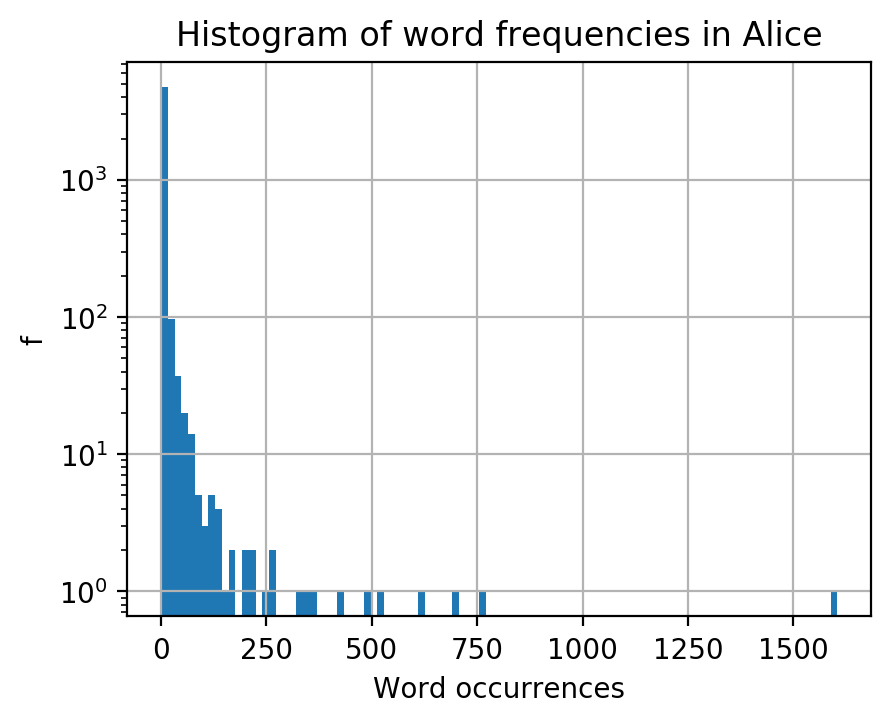

In [40]:
import matplotlib.pyplot as plt

x = [ len(alice_dict[i]) for i in alice_dict ] # Counts of words in Alice

# the histogram of the data, using 100 bins
n, bins, patches = plt.hist(x, 100, log=1)

plt.xlabel('Word occurrences')
plt.ylabel('f')
plt.title('Histogram of word frequencies in Alice')
plt.grid(True)
plt.show()

# Challenge 3: Indexing with dictionaries

In [14]:
# Write a function "index_capitalized_words" to build a dictionary of 
# all words starting with a capital letter and their occurrences in the text.

# E.g. if the text was [ "Alice!", "said", "the", "Queen", "of", "Hearts.", "Alice!"]
# the return value of the function would be 
# { "Alice!":[0,6], "Queen":[3], "Hearts.":[5] }

# First let's reload Alice to not ignore capitalization:
with open(local_copy) as fh:
  alice_text = fh.read()
alice_words = alice_text.split()

# Code to complete here
def index_capitalized_words(words):
    return {}


# Test code
d = index_capitalized_words(alice_words)
print(f"There are {len(d)} capitalized words in Alice")
  

There are 0 capitalized words in Alice



# Homework

* Zybooks Reading 17
* Go to Canvas and complete the lecture quiz, which involves completing each challenge problem
* Please, please fill out the SETS evaluation for CSE20! We appreciate any kind comments and constructive criticism you have!!